In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model_data = pd.read_csv('winequality-red.csv')



In [85]:
corr = model_data.corr()
print(corr)

                      fixed acidity    ...      quality
fixed acidity              1.000000    ...     0.124052
volatile acidity          -0.256131    ...    -0.390558
citric acid                0.671703    ...     0.226373
residual sugar             0.114777    ...     0.013732
chlorides                  0.093705    ...    -0.128907
free sulfur dioxide       -0.153794    ...    -0.050656
total sulfur dioxide      -0.113181    ...    -0.185100
density                    0.668047    ...    -0.174919
pH                        -0.682978    ...    -0.057731
sulphates                  0.183006    ...     0.251397
alcohol                   -0.061668    ...     0.476166
quality                    0.124052    ...     1.000000

[12 rows x 12 columns]


In [86]:
#Creating the testing and training dataset
x = model_data[['volatile acidity','citric acid','sulphates','alcohol']]
y = model_data['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 101)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 4)
x_poly_train = poly_feature.fit_transform(x_train)
poly_feature.fit(x_poly_train,y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(x_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

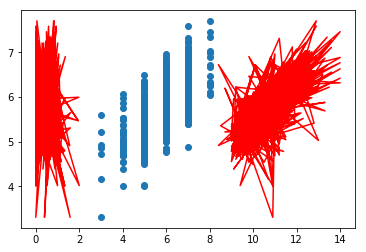

In [89]:
prediction_train = lm.predict(x_poly_train)
plt.scatter(y_train,prediction_train)
plt.plot(x_train,prediction_train,color='Red')
plt.show()

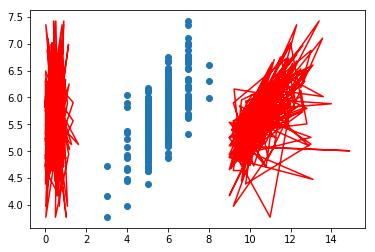

In [90]:
x_poly_test = poly_feature.fit_transform(x_test)
poly_feature.fit(x_poly_test,y_test)
lm.fit(x_poly_test,y_test)
prediction_test = lm.predict(x_poly_test)
plt.scatter(y_test,prediction_test)
plt.plot(x_test,prediction_test,color='Red')
plt.show()

In [91]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,prediction_test))
print('MSE : ',metrics.mean_squared_error(y_test,prediction_test))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction_test)))

MAE :  0.46044921875
MSE :  0.3699798583984375
RMSE :  0.6082596965100001


In [92]:
#calculating metrics for train

print('MAE : ',metrics.mean_absolute_error(y_train,prediction_train))
print('MSE : ',metrics.mean_squared_error(y_train,prediction_train))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))


MAE :  0.4710793865444729
MSE :  0.3491482994558973
RMSE :  0.5908877215308314


In [93]:
R2_test = metrics.r2_score(y_test,prediction_test)
adjusted_R2_test = 1-(1-R2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('R2 test value : ', R2_test)
print('Adjusted_R2_test_value : ',adjusted_R2_test)

R2 test value :  0.4656124816632815
Adjusted_R2_test_value :  0.45882660841456124


In [94]:
R2_train = metrics.r2_score(y_train,prediction_train)
adjusted_R2_train = 1-(1-R2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print('R2 train value : ', R2_train)
print('Adjusted_R2_train_value : ',adjusted_R2_train)

R2 train value :  0.4551966750700287
Adjusted_R2_train_value :  0.4534861465773129
